In [1]:
%pip install pandas numpy
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.colors as colors
%pip install scipy seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Чтение файл
pl=pd.read_csv('Google-Playstore.csv')

## Делаем копию DataFrame и основные преобразования

In [67]:
# Создаем копию DataFrame 
pl_c=pl.copy(deep=True)
# Удаляем атрибуты не влияющие на анализ
pl_store=pl_c.drop(columns=["Developer Id", "Developer Website","Developer Email","Privacy Policy", "Content Rating", "Editors Choice", "Size"])
# Корректируем название столбцов
new_columns={"App Name":'App_name', "Rating Count":'Rating_count',"Minimum Installs":'Minimum_installs', "Maximum Installs":'Maximum_installs',
             "Last Updated": 'Last_updated', "Ad Supported": 'Ad_supported', "In App Purchases":'In_app_purchases', "App Id":'App_id'}
pl_store=pl_store.rename(columns=new_columns, inplace=False)
# Переименовываем содержимое стобца 'Free' и изменяем тип-данных
pl_store['Free']=pl_store['Free'].astype(str)
pl_store['Free']=pl_store['Free'].replace({'True':'Free', 'False':'Paid'})

pl_store['Ad_supported']=pl_store['Ad_supported'].astype(str)
pl_store['In_app_purchases']=pl_store['In_app_purchases'].astype(str)

# Приводим к формату Date и в столбце Released and Last_updated оставляем только год
pl_store['Released']=pd.to_datetime(pl_store['Released'])
pl_store['Released']=pl_store['Released'].dt.year
pl_store['Last_updated']=pd.to_datetime(pl_store['Last_updated'])
pl_store['Last_updated']=pl_store['Last_updated'].dt.year

# Заменяем пропуски в столбце Released на значения из столбца Last_update
pl_store['Released'].fillna(value=pl_store['Last_updated'], inplace=True)
pl_store['Released']=pl_store['Released'].astype('int32')

C:\Users\Valentin\AppData\Local\Temp\ipykernel_2692\111435355.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pl_store['Released'].fillna(value=pl_store['Last_updated'], inplace=True)


## Создаем базу для подлюченич к SQL

In [5]:
###### SQL
%pip install sqlite3
import sqlite3

# Создаем базу данных: play_store
connection = sqlite3.connect('play_store.db')
# Создаем переменную 'с' для запроса к базе данных
c = connection.cursor()
# перевод DataFrame в таблицу для SQL с помощью функции to_sql
pl_store.to_sql('play_store', connection, if_exists='replace', index=False)

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


2312944

In [100]:
pl_store.head(10)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,Free,0.0,USD,7.1 and up,2020,2020,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+","5,000.0",7662,Free,0.0,USD,5.0 and up,2020,2021,True,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,Free,0.0,USD,4.0.3 and up,2019,2019,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,Free,0.0,USD,4.0.3 and up,2018,2018,True,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,Free,0.0,USD,4.1 and up,2020,2018,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,Free,0.0,USD,6.0 and up,2018,2019,False,True,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+","1,000.0",2567,Free,0.0,USD,4.1 and up,2019,2019,True,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,Free,0.0,USD,5.0 and up,2019,2019,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,Free,0.0,USD,4.4 and up,2018,2018,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+","50,000.0",62433,Free,0.0,USD,4.1 and up,2019,2020,True,False,2021-06-15 20:19:35


In [98]:
pd.options.display.float_format = '{:,.1f}'.format

In [70]:
rows=pl_store.shape[1]
columps=pl_store.shape[0]
print(f'Количество столбцов в DataFrame={rows},'f' '
      f'Количество строк в DataFrame={columps}')

Количество столбцов в DataFrame=17, Количество строк в DataFrame=2312944


In [71]:
pl_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App_name          object 
 1   App_id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating_count      float64
 5   Installs          object 
 6   Minimum_installs  float64
 7   Maximum_installs  int64  
 8   Free              object 
 9   Price             float64
 10  Currency          object 
 11  Minimum Android   object 
 12  Released          int32  
 13  Last_updated      int32  
 14  Ad_supported      object 
 15  In_app_purchases  object 
 16  Scraped Time      object 
dtypes: float64(4), int32(2), int64(1), object(10)
memory usage: 282.3+ MB


In [72]:
pl_store.isna().sum()

App_name                5
App_id                  0
Category                0
Rating              22883
Rating_count        22883
Installs              107
Minimum_installs      107
Maximum_installs        0
Free                    0
Price                   0
Currency              135
Minimum Android      6530
Released                0
Last_updated            0
Ad_supported            0
In_app_purchases        0
Scraped Time            0
dtype: int64

In [87]:
(pl_store.isna().sum().sort_values(ascending=False)/len(pl_store)*100).apply(lambda x: f'{x:.1%}')

Rating              98.9%
Rating_count        98.9%
Minimum Android     28.2%
Currency             0.6%
Installs             0.5%
Minimum_installs     0.5%
App_name             0.0%
In_app_purchases     0.0%
Ad_supported         0.0%
Last_updated         0.0%
Released             0.0%
Free                 0.0%
Price                0.0%
App_id               0.0%
Maximum_installs     0.0%
Category             0.0%
Scraped Time         0.0%
dtype: object

In [ ]:
# У названий есть дублика, но App_id у всех разный
sort=pl_store[pl_store['App_name']=='BMI Calculator']
sort.head(4)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
8545,BMI Calculator,es.trellat.imc,Health & Fitness,4.5,10.0,"5,000+",5000.0,8096,Free,0.0,USD,4.2 and up,2017,2018,True,False,2021-06-15 20:27:58
9684,BMI Calculator,com.fitneske.bmicalculator,Productivity,0.0,0.0,1+,1.0,3,Free,0.0,USD,4.1 and up,2020,2020,False,False,2021-06-15 20:29:02
11972,BMI Calculator,com.gamosoftstudio.bmicalculator,Health & Fitness,0.0,0.0,10+,10.0,21,Free,0.0,USD,5.0 and up,2020,2020,True,False,2021-06-15 20:31:16
15105,BMI Calculator,com.mohitatray.bmicalculator,Health & Fitness,4.6,35.0,"1,000+",1000.0,3324,Free,0.0,USD,4.0 and up,2017,2018,True,False,2021-06-15 20:34:16


## Раздел 1. Категории

In [278]:
pl_store['Category'].value_counts()

Category
Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto 

In [104]:
# Находим топ-20 категорий по количеству приложений в каждой категории
cat=pl_store.groupby(['Category'])['App_name'].count().sort_values(ascending=False).reset_index()
cat.head(10)

,Category,App_name
0,Education,241090
1,Music & Audio,154906
2,Tools,143988
3,Business,143771
4,Entertainment,138274
5,Lifestyle,118331
6,Books & Reference,116728
7,Personalization,89210
8,Health & Fitness,83510
9,Productivity,79698


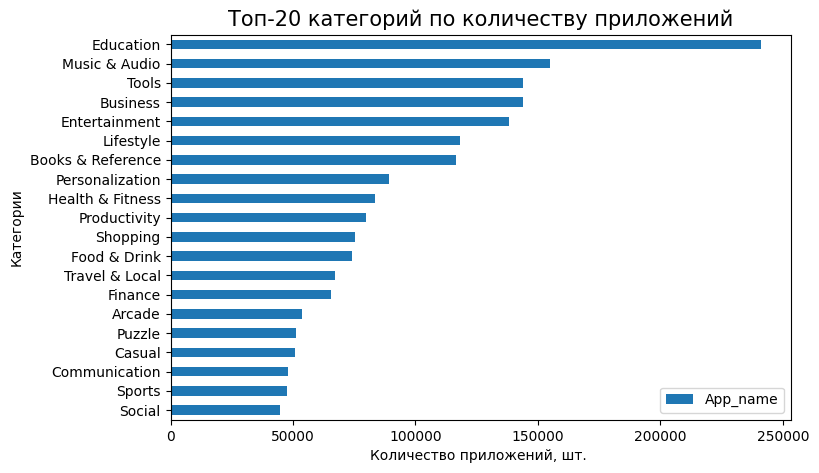

In [106]:
cat.head(20).sort_index(ascending=False).plot( x='Category', y='App_name', kind='barh',figsize=(8, 5))

plt.title('Топ-20 категорий по количеству приложений', size=15)
plt.xlabel('Количество приложений, шт. ')
plt.ylabel('Категории')
plt.show()

## Определяем Топ-20 категорий по популярности (популярность определяется, как макиммально количество скачиваний в этой категории)

In [158]:
pl_store_1=pl_store.groupby(['Category'])['Maximum_installs'].sum().reset_index().sort_values(by=['Maximum_installs'], ascending=[False])
pl_store_1['Max_installs_млн_раз']=pl_store_1['Maximum_installs']//1000000
pl_store_1.head(3)

,Category,Maximum_installs,Max_installs_млн_раз
42,Tools,119849500546,119849
13,Communication,72306404399,72306
33,Productivity,45368330480,45368


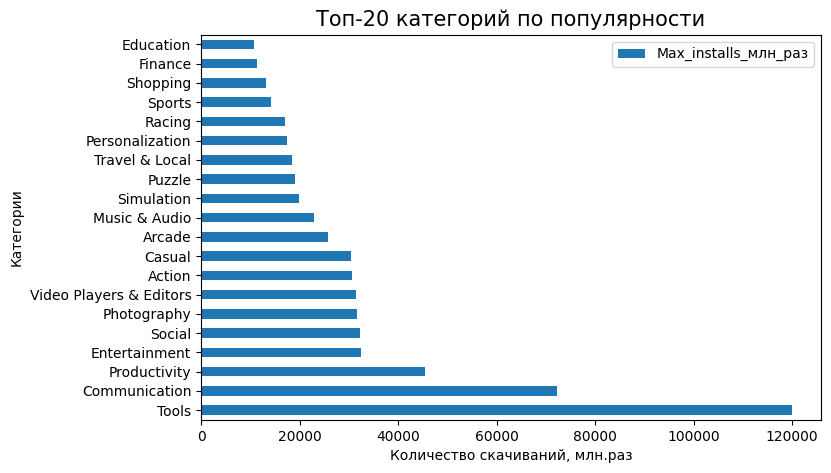

In [173]:
pl_store_1.sort_values(by='Max_installs_млн_раз',ascending=False).head(20).plot(x='Category', y='Max_installs_млн_раз', kind='barh',figsize=(8, 5))

plt.title('Топ-20 категорий по популярности', size=15)
plt.xlabel('Количество скачиваний, млн.раз')
plt.ylabel('Категории')
plt.show()

## Рассматриваем изменение популярности категорий по годам с 2016 по 2021 г.

In [ ]:
pl_store_2=pl_store.groupby(['Category','Released'])['Maximum_installs'].sum().reset_index().sort_values(by=['Maximum_installs'], ascending=[False])
pl_store_2.head(1)

,Category,Released,Maximum_installs
158,Communication,2010,21534667302


In [161]:
# Сделали группировку по количеству установок приложений в порядке убывания и по годам в порядке возрастания
pl_store_2=pl_store.groupby(['Category','Released'])['Maximum_installs'].sum().reset_index().sort_values(by=['Released','Maximum_installs'], ascending=[True,False])
# Год релиза установили, что начинается с 2016 года по 2021 г.
pl_store_2=pl_store_2.query('Released>=2016')
pl_store_2.head(5)


,Category,Released,Maximum_installs
516,Tools,2016,8948351471
164,Communication,2016,5121086075
6,Action,2016,4389325707
140,Casual,2016,3632928801
346,Music & Audio,2016,3124225684


In [162]:
# Сделали функцию, которая  выводит тот-10 категорий по количеству установок и ы опредленный год.
def top_categ_year(df, year, category, install_max, n=7):
    result = []
    for i, j in pl_store_2.groupby(year):
        top_n = j.nlargest(n, install_max)[[category, install_max, year]]
        result.append(top_n)
    return pd.concat(result)

tot_res=top_categ_year(pl_store_1,'Released','Category','Maximum_installs', n=7).reset_index()
tot_res['Maximum_installs, млн.уст.']=tot_res['Maximum_installs']//1000000
tot_res.head(10)

,index,Category,Maximum_installs,Released,"Maximum_installs, млн.уст."
0,516,Tools,8948351471,2016,8948
1,164,Communication,5121086075,2016,5121
2,6,Action,4389325707,2016,4389
3,140,Casual,3632928801,2016,3632
4,346,Music & Audio,3124225684,2016,3124
5,431,Racing,2919318254,2016,2919
6,467,Simulation,2719247786,2016,2719
7,517,Tools,12498277589,2017,12498
8,395,Photography,5123737897,2017,5123
9,7,Action,4707192401,2017,4707


C:\Users\Valentin\AppData\Local\Temp\ipykernel_2692\9433973.py:5: UserWarning: 
The palette list has fewer values (10) than needed (42) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(tot_res, x="Released", y="Maximum_installs, млн.уст.", hue="Category", hue_order=tot_res['Category'],palette=a, width=True)


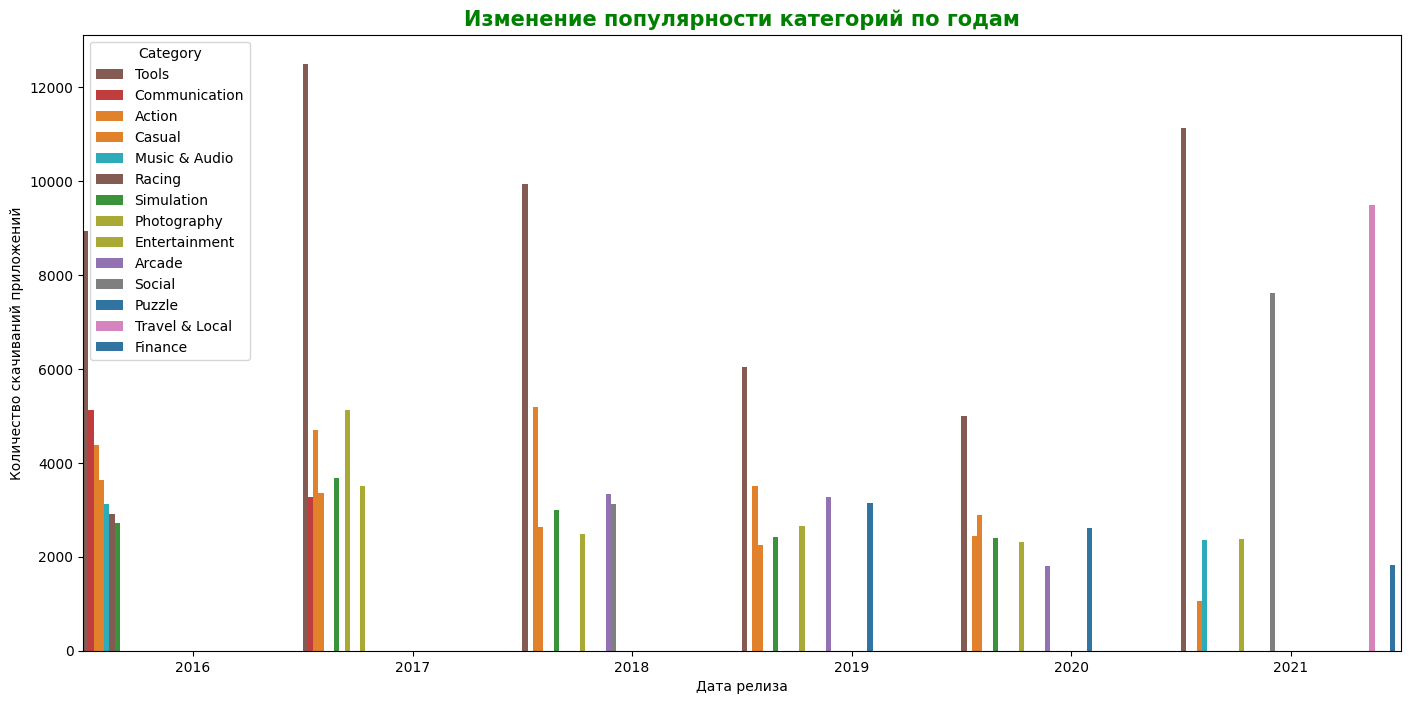

In [163]:
colors_list = list(colors._colors_full_map.values())
a=sns.color_palette()
rcParams['figure.figsize']= 17,8

sns.barplot(tot_res, x="Released", y="Maximum_installs, млн.уст.", hue="Category", hue_order=tot_res['Category'],palette=a, width=True)
plt.xlabel('Дата релиза')
plt.ylabel('Количество скачиваний приложений')
plt.title('Изменение популярности категорий по годам', size=15, color='g', weight='bold');

## Рассматриваем изменение  количества реализации приложений по годам с 2016 г. по 2021г. 

In [169]:
# Сделали группировку по количеству приложений в порядке убывния и по годвм в порядку возрастания
pl_store_3=pl_store.groupby(['Category','Released'])['App_name'].count().reset_index().sort_values(by=['Released','App_name'], ascending=[True,False])
pl_store_3=pl_store_3.query('Released>=2016')
pl_store_3.head(5)
# Сделали функцию, выводящая тот-5 приложений по количеству выпусков приложений и  по годам.
def top_categ_year(df, year, category, count_app, n=7):
    result = []
    for i, j in pl_store_3.groupby(year):
        top_n = j.nlargest(n, count_app)[[category, count_app, year]]
        result.append(top_n)
    return pd.concat(result)

tot_app=top_categ_year(pl_store_3,'Released','Category','App_name', n=7).reset_index()
#tot_res['Maximum_installs, млн.уст.']=tot_res['Maximum_installs']//1000000
tot_app.head(10)

,index,Category,App_name,Released
0,188,Education,17559,2016
1,299,Lifestyle,13243,2016
2,103,Business,10900,2016
3,91,Books & Reference,10655,2016
4,516,Tools,9853,2016
5,346,Music & Audio,8973,2016
6,213,Entertainment,8017,2016
7,189,Education,30413,2017
8,104,Business,17086,2017
9,300,Lifestyle,16487,2017


C:\Users\Valentin\AppData\Local\Temp\ipykernel_2692\2328831390.py:5: UserWarning: 
The palette list has fewer values (10) than needed (42) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(tot_app, x="Released", y="App_name", hue="Category", hue_order=tot_app['Category'],palette=a, width=True)


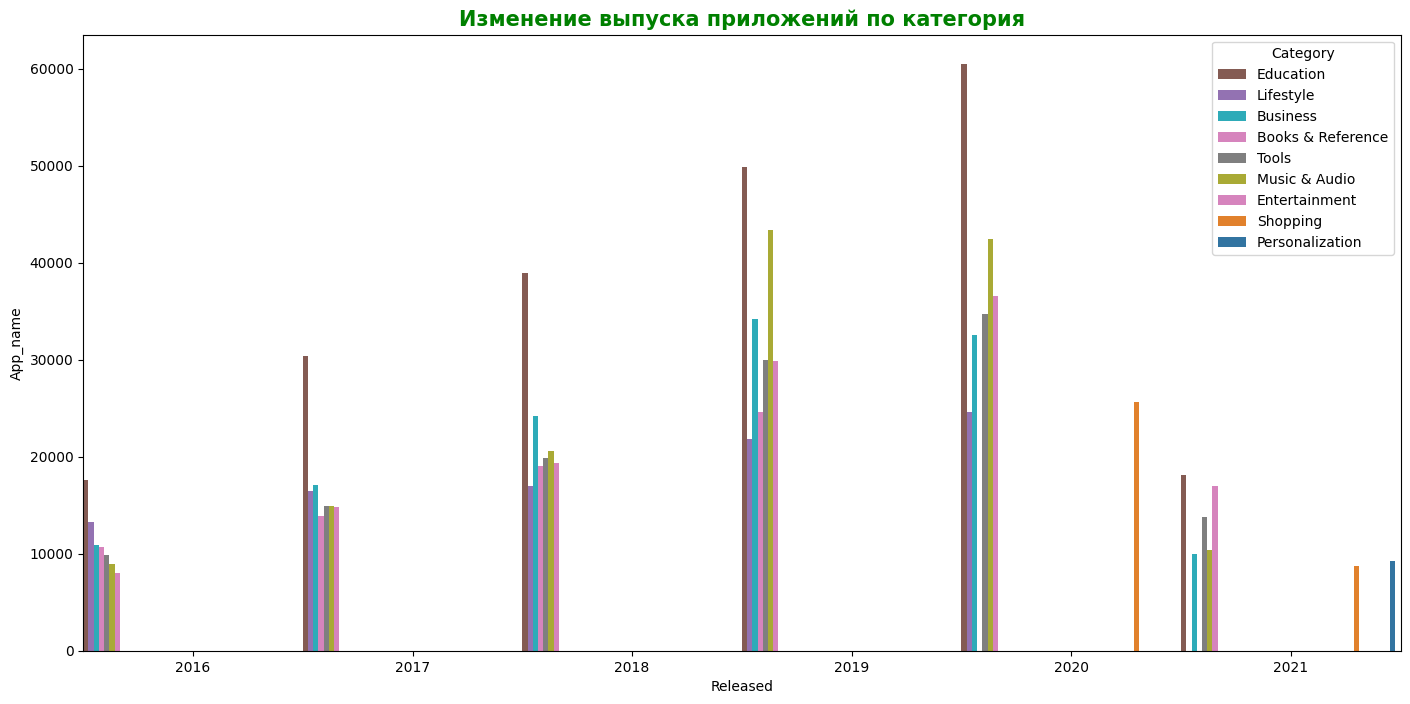

In [171]:
#colors_list = list(colors._colors_full_map.values())
a=sns.color_palette()
rcParams['figure.figsize']= 17,8

sns.barplot(tot_app, x="Released", y="App_name", hue="Category", hue_order=tot_app['Category'],palette=a, width=True)
plt.title('Изменение выпуска приложений по категория', size=15, color='g', weight='bold');

## Топ-10 самых популярных ПРИЛОЖЕНИЙ по категориям

In [176]:
query='select App_name, Category,Rating, max(Maximum_installs) as Max_installs from play_store group by Category order by Max_installs desc;'
result= c.execute(query).fetchall()
result


[('Google Play services', 'Tools', 4.2, 12057627016),
 ('YouTube', 'Video Players & Editors', 4.4, 9766230924),
 ('Google Maps - Navigate & Explore', 'Travel & Local', 3.8, 9141671889),
 ('Google Chrome: Fast & Secure', 'Communication', 4.1, 8925640788),
 ('Google Drive', 'Productivity', 4.3, 7028265259),
 ('Facebook', 'Social', 2.3, 6782619635),
 ('Google Photos', 'Photography', 4.5, 5754179589),
 ('Google Play Games', 'Entertainment', 4.3, 4605543029),
 ('Google Play Books - Ebooks, Audiobooks, and Comics',
  'Books & Reference',
  4.1,
  3202676731),
 ('Google News - Top world & local news headlines',
  'News & Magazines',
  4.1,
  2961820154),
 ('Samsung One UI Home', 'Personalization', 4.0, 2158959897),
 ('Android Auto', 'Auto & Vehicles', 4.3, 1976625745),
 ('Subway Surfers', 'Arcade', 4.6, 1704495994),
 ('Secure Folder', 'Business', 4.2, 1410817280),
 ('Samsung Health', 'Health & Fitness', 3.6, 1341624888),
 ('Candy Crush Saga', 'Casual', 4.6, 1208422684),
 ('YouTube Music', 'Mu

In [177]:
columns = [column[0] for column in c.description]
columns

['App_name', 'Category', 'Rating', 'Max_installs']

In [191]:
table_1=pd.DataFrame(result, columns=columns)
table_1=table_1.sort_values(by='Max_installs',ascending=False).nlargest(10,'Max_installs').reset_index()
table_1['Max_installs_млн_раз']=table_1['Max_installs']//1000000
table_1


,index,App_name,Category,Rating,Max_installs,Max_installs_млн_раз
0,0,Google Play services,Tools,4.2,12057627016,12057
1,1,YouTube,Video Players & Editors,4.4,9766230924,9766
2,2,Google Maps - Navigate & Explore,Travel & Local,3.8,9141671889,9141
3,3,Google Chrome: Fast & Secure,Communication,4.1,8925640788,8925
4,4,Google Drive,Productivity,4.3,7028265259,7028
5,5,Facebook,Social,2.3,6782619635,6782
6,6,Google Photos,Photography,4.5,5754179589,5754
7,7,Google Play Games,Entertainment,4.3,4605543029,4605
8,8,"Google Play Books - Ebooks, Audiobooks, and Co...",Books & Reference,4.1,3202676731,3202
9,9,Google News - Top world & local news headlines,News & Magazines,4.1,2961820154,2961


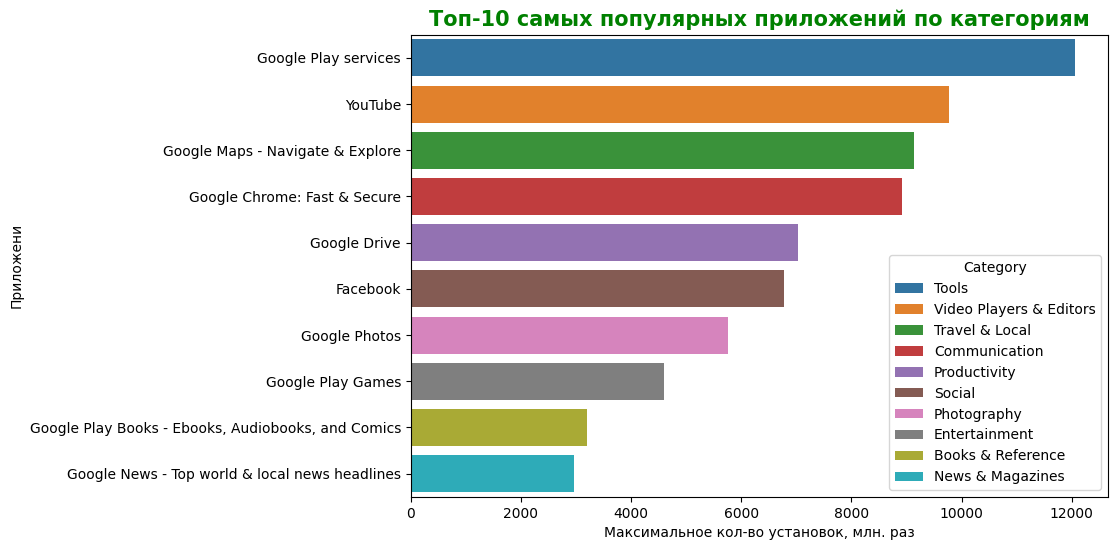

In [ ]:
a=sns.color_palette()
rcParams['figure.figsize']= 9,6


sns.barplot(table_1, x="Max_installs_млн_раз", y='App_name', hue='Category',palette=a)
plt.title('Топ-10 самых популярных приложений по категориям', size=15, color='g', weight='bold')
plt.xticks(rotation=0);
plt.yticks(rotation=0);
plt.xlabel('Максимальное кол-во установок, млн. раз');
plt.ylabel('Приложени');

## Выводим категории по кол-ву платных и бесплатных приложений в абсолютном и относительном значении

In [234]:
query_2='''with  tot_name AS (Select Category, Free , count(App_Name)  AS quantity_app from play_store group by Category,Free), top_a AS 
(SELECT *, (sum(quantity_app) OVER (PARTITION BY Category)) AS total_quant FROM tot_name) 
SELECT *, (CAST (quantity_app AS float)/CAST(total_quant AS float)) AS rate FROM top_a GROUP BY Category, FREE ORDER BY total_quant desc;
'''

result_2= c.execute(query_2).fetchall()
result_2

[('Education', 'Free', 234541, 241090, 0.9728358704218342),
 ('Education', 'Paid', 6549, 241090, 0.02716412957816583),
 ('Music & Audio', 'Free', 153381, 154906, 0.9901553200005164),
 ('Music & Audio', 'Paid', 1525, 154906, 0.009844679999483557),
 ('Tools', 'Free', 139907, 143988, 0.9716573603355835),
 ('Tools', 'Paid', 4081, 143988, 0.02834263966441648),
 ('Business', 'Free', 143098, 143771, 0.9953189447106857),
 ('Business', 'Paid', 673, 143771, 0.0046810552893142565),
 ('Entertainment', 'Free', 136890, 138274, 0.9899908876578388),
 ('Entertainment', 'Paid', 1384, 138274, 0.010009112342161217),
 ('Lifestyle', 'Free', 116987, 118331, 0.9886420295611463),
 ('Lifestyle', 'Paid', 1344, 118331, 0.011357970438853724),
 ('Books & Reference', 'Free', 113131, 116728, 0.9691847714344459),
 ('Books & Reference', 'Paid', 3597, 116728, 0.030815228565554107),
 ('Personalization', 'Free', 83442, 89210, 0.9353435713485035),
 ('Personalization', 'Paid', 5768, 89210, 0.06465642865149647),
 ('Health & 

In [235]:
columns = [column[0] for column in c.description]
columns

['Category', 'Free', 'quantity_app', 'total_quant', 'rate']

In [240]:
table_2=pd.DataFrame(result_2, columns=columns)
table_2['rate']=table_2['rate'].apply(lambda x: f'{x:.1%}')
table_2.head(10)
total_str=table_2.reset_index()
tot=total_str.query('index<=19')
tot.head(4)

,index,Category,Free,quantity_app,total_quant,rate
0,0,Education,Free,234541,241090,97.3%
1,1,Education,Paid,6549,241090,2.7%
2,2,Music & Audio,Free,153381,154906,99.0%
3,3,Music & Audio,Paid,1525,154906,1.0%


C:\Users\Valentin\AppData\Local\Temp\ipykernel_2692\3332024525.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(tot, x="quantity_app", y="Category", hue="Free",palette=a)


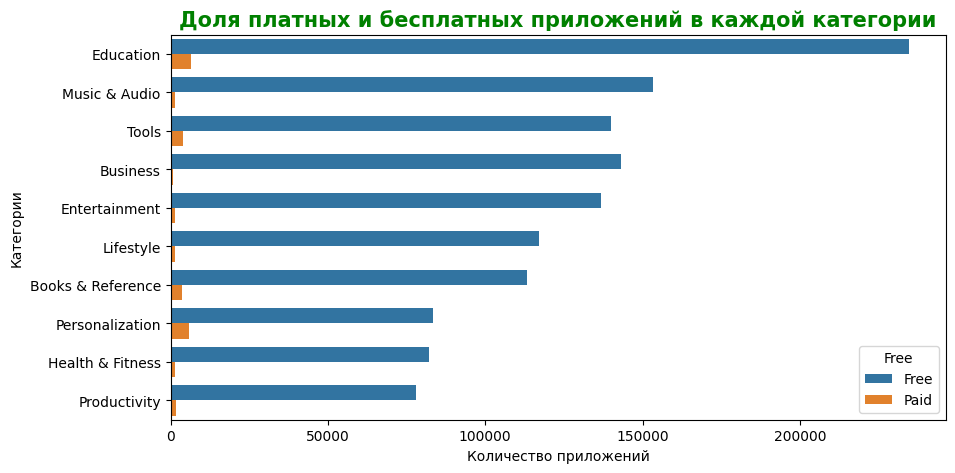

In [243]:
a=sns.color_palette()
rcParams['figure.figsize']= 10,5

sns.barplot(tot, x="quantity_app", y="Category", hue="Free",palette=a)
plt.title('Доля платных и бесплатных приложений в каждой категории', size=15, color='g', weight='bold');
plt.xticks(rotation=0);
plt.yticks(rotation=0);
plt.xlabel('Количество приложений');
plt.ylabel('Категории');

## Вывод: В каждой категории больше бесплатных приложений, чем платных

## Выводим категории по кол-во наличия или отсутствия рекламы в приложениях в абсолютном и относительном значении

In [244]:
query_3='''WITH advert AS (SELECT Category, Ad_supported, count(App_name) AS quantity_app FROM play_store GROUP BY Category, Ad_supported), 
qut AS (SELECT *, (sum(quantity_app) OVER (PARTITION BY category)) AS total_sum_app FROM advert ORDER BY total_sum_app DESC)
SELECT *, (CAST (quantity_app AS float)/CAST(total_sum_app AS float)) AS rate FROM qut GROUP BY Category, Ad_supported ORDER BY Category, rate desc;

'''
result_3= c.execute(query_3).fetchall()
result_3

[('Action', 'True', 22334, 27555, 0.8105244057339865),
 ('Action', 'False', 5221, 27555, 0.18947559426601343),
 ('Adventure', 'True', 17995, 23203, 0.7755462655691074),
 ('Adventure', 'False', 5208, 23203, 0.22445373443089256),
 ('Arcade', 'True', 42305, 53790, 0.7864844766685257),
 ('Arcade', 'False', 11485, 53790, 0.21351552333147425),
 ('Art & Design', 'True', 13217, 18539, 0.7129294999730298),
 ('Art & Design', 'False', 5322, 18539, 0.28707050002697015),
 ('Auto & Vehicles', 'False', 13615, 18280, 0.7448030634573304),
 ('Auto & Vehicles', 'True', 4665, 18280, 0.25519693654266956),
 ('Beauty', 'True', 5963, 11772, 0.5065409446143391),
 ('Beauty', 'False', 5809, 11772, 0.49345905538566087),
 ('Board', 'True', 7480, 10588, 0.7064601435587458),
 ('Board', 'False', 3108, 10588, 0.29353985644125424),
 ('Books & Reference', 'True', 88702, 116728, 0.759903365088068),
 ('Books & Reference', 'False', 28026, 116728, 0.240096634911932),
 ('Business', 'False', 129116, 143771, 0.8980670649852891

In [245]:
columns_1 = [column[0] for column in c.description]
columns_1

['Category', 'Ad_supported', 'quantity_app', 'total_sum_app', 'rate']

In [268]:
table_3=pd.DataFrame(result_3, columns=columns_1)
table_3.head(4)

,Category,Ad_supported,quantity_app,total_sum_app,rate
0,Action,True,22334,27555,0.8
1,Action,False,5221,27555,0.2
2,Adventure,True,17995,23203,0.8
3,Adventure,False,5208,23203,0.2


## Какая доля приложений с рекламой по категориям (Топ-10 категорий)

In [269]:
table_3_true=table_3.query('Ad_supported=="True"').sort_values(by='rate', ascending=False).reset_index().nlargest(10,'rate')
table_3_true['Rate_false']=(1-table_3_true['rate'])
table_3_true['Rate_false']=table_3_true['Rate_false'].apply(lambda x: f'{x:.1%}')
table_3_true['rate']=table_3_true['rate'].apply(lambda x: f'{x:.1%}')
table_3_true.rename(columns={'rate':'Rate_true'}, inplace=True)
table_3_true

,index,Category,Ad_supported,quantity_app,total_sum_app,Rate_true,Rate_false
0,70,Racing,True,9183,10362,88.6%,11.4%
1,94,Word,True,7473,8630,86.6%,13.4%
2,76,Simulation,True,19918,23282,85.6%,14.4%
3,88,Trivia,True,10018,11795,84.9%,15.1%
4,54,Music,True,3485,4202,82.9%,17.1%
5,64,Photography,True,29378,35552,82.6%,17.4%
6,68,Puzzle,True,42271,51168,82.6%,17.4%
7,62,Personalization,True,73184,89210,82.0%,18.0%
8,0,Action,True,22334,27555,81.1%,18.9%
9,56,Music & Audio,True,124832,154906,80.6%,19.4%


## Какая доля приложений без рекламы по категориям (Топ-10 категорий)

In [273]:
table_3_false=table_3.query('Ad_supported=="False"').sort_values(by='rate', ascending=False).reset_index().nlargest(10,'rate')
table_3_false['Rate_true']=1-table_3_false['rate']
table_3_false['Rate_true']=table_3_false['Rate_true'].apply(lambda x: f'{x:.1%}')
table_3_false['rate']=table_3_false['rate'].apply(lambda x: f'{x:.1%}')
table_3_false.rename(columns={'rate':'Rate_false'}, inplace=True) # переименовываем
table_3_false

,index,Category,Ad_supported,quantity_app,total_sum_app,Rate_false,Rate_true
0,16,Business,False,129116,143771,89.8%,10.2%
1,74,Shopping,False,64435,75256,85.6%,14.4%
2,52,Medical,False,26453,32065,82.5%,17.5%
3,36,Events,False,10252,12841,79.8%,20.2%
4,40,Food & Drink,False,57463,73927,77.7%,22.3%
5,38,Finance,False,49398,65466,75.5%,24.5%
6,86,Travel & Local,False,50224,67288,74.6%,25.4%
7,66,Productivity,False,59400,79698,74.5%,25.5%
8,8,Auto & Vehicles,False,13615,18280,74.5%,25.5%
9,42,Health & Fitness,False,61447,83510,73.6%,26.4%


## Выводим категории по кол-во приложений,где есть покупки или нет в абсолютном и относительном значении

In [252]:
query_4='''WITH purch AS (SELECT Category, In_app_purchases, count(App_name) AS quantity_app_p FROM play_store GROUP BY Category,In_app_purchases), quant1 AS (
SELECT *, (sum(quantity_app_p) OVER (PARTITION BY Category)) AS total_sum_app_p FROM purch ORDER BY total_sum_app_p DESC)
SELECT *, (CAST (quantity_app_p AS float)/CAST(total_sum_app_p AS float)) AS rate_p FROM quant1 GROUP BY Category, In_app_purchases ORDER BY Category, rate_p asc;

'''
result_4= c.execute(query_4).fetchall()
result_4

[('Action', 'True', 7573, 27555, 0.27483215387407006),
 ('Action', 'False', 19982, 27555, 0.72516784612593),
 ('Adventure', 'True', 4730, 23203, 0.20385295004956255),
 ('Adventure', 'False', 18473, 23203, 0.7961470499504374),
 ('Arcade', 'True', 10397, 53790, 0.19328871537460496),
 ('Arcade', 'False', 43393, 53790, 0.8067112846253951),
 ('Art & Design', 'True', 843, 18539, 0.04547170829063056),
 ('Art & Design', 'False', 17696, 18539, 0.9545282917093695),
 ('Auto & Vehicles', 'True', 898, 18280, 0.04912472647702407),
 ('Auto & Vehicles', 'False', 17382, 18280, 0.950875273522976),
 ('Beauty', 'True', 230, 11772, 0.019537886510363575),
 ('Beauty', 'False', 11542, 11772, 0.9804621134896364),
 ('Board', 'True', 2490, 10588, 0.23517189270872685),
 ('Board', 'False', 8098, 10588, 0.7648281072912732),
 ('Books & Reference', 'True', 8526, 116728, 0.07304160098690973),
 ('Books & Reference', 'False', 108202, 116728, 0.9269583990130903),
 ('Business', 'True', 3025, 143771, 0.021040404532207468),

In [253]:
columns_p= [column[0] for column in c.description]
columns_p

['Category', 'In_app_purchases', 'quantity_app_p', 'total_sum_app_p', 'rate_p']

In [254]:
table_4=pd.DataFrame(result_4, columns=columns_p)
table_4.head(4)

,Category,In_app_purchases,quantity_app_p,total_sum_app_p,rate_p
0,Action,True,7573,27555,0.3
1,Action,False,19982,27555,0.7
2,Adventure,True,4730,23203,0.2
3,Adventure,False,18473,23203,0.8


## Какая доля приложений с возможностью покупать внутри приложений по категориям (Топ-10 категорий)

In [ ]:
table_4_true=table_4.query('In_app_purchases=="True"').sort_values(by='rate_p', ascending=False).reset_index().nlargest(10,'rate_p')
table_4_true['Rate_false']=(1-table_4_true['rate_p'])
table_4_true['Rate_false']=table_4_true['Rate_false'].apply(lambda x: f'{x:.1%}')
table_4_true['rate_p']=table_4_true['rate_p'].apply(lambda x: f'{x:.1%}')
table_4_true.rename(columns={'rate_p':'Rate_true'}, inplace=True)
table_4_true

,index,Category,In_app_purchases,quantity_app_p,total_sum_app_p,Rate_true,Rate_false
0,20,Casino,True,2526,5076,49.8%,50.2%
1,72,Role Playing,True,4686,10034,46.7%,53.3%
2,82,Strategy,True,3342,8526,39.2%,60.8%
3,94,Word,True,3150,8630,36.5%,63.5%
4,18,Card,True,2720,8179,33.3%,66.7%
5,76,Simulation,True,7265,23282,31.2%,68.8%
6,70,Racing,True,3026,10362,29.2%,70.8%
7,28,Dating,True,1904,6524,29.2%,70.8%
8,0,Action,True,7573,27555,27.5%,72.5%
9,68,Puzzle,True,12558,51168,24.5%,75.5%


## Какая доля приложений без возможности покупать внутри приложений по категориям (Топ-10 категорий)

In [275]:
table_4_false=table_4.query('In_app_purchases=="False"').sort_values(by='rate_p', ascending=False).reset_index().nlargest(10,'rate_p')
table_4_false['Rate_true']=1-table_4_false['rate_p']
table_4_false['Rate_true']=table_4_false['Rate_true'].apply(lambda x: f'{x:.1%}')
table_4_false['rate_p']=table_4_false['rate_p'].apply(lambda x: f'{x:.1%}')
table_4_false.rename(columns={'rate_p':'Rate_false'}, inplace=True) # переименовываем
table_4_false

,index,Category,In_app_purchases,quantity_app_p,total_sum_app_p,Rate_false,Rate_true
0,75,Shopping,False,74613,75256,99.1%,0.9%
1,37,Events,False,12684,12841,98.8%,1.2%
2,11,Beauty,False,11542,11772,98.0%,2.0%
3,17,Business,False,140746,143771,97.9%,2.1%
4,45,House & Home,False,13989,14369,97.4%,2.6%
5,41,Food & Drink,False,71815,73927,97.1%,2.9%
6,57,Music & Audio,False,150414,154906,97.1%,2.9%
7,39,Finance,False,62970,65466,96.2%,3.8%
8,27,Communication,False,46128,48167,95.8%,4.2%
9,7,Art & Design,False,17696,18539,95.5%,4.5%


## Раздел 2. Цены приложений

In [277]:
pl_store['Price'].value_counts()

Price
0.0     2268011
1.0       11851
2.0        5817
3.0        3921
1.5        3823
         ...   
8.2           1
1.0           1
13.5          1
3.5           1
18.9          1
Name: count, Length: 1063, dtype: int64

C:\Users\Valentin\AppData\Local\Temp\ipykernel_2692\1226232294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pict=sns.catplot(


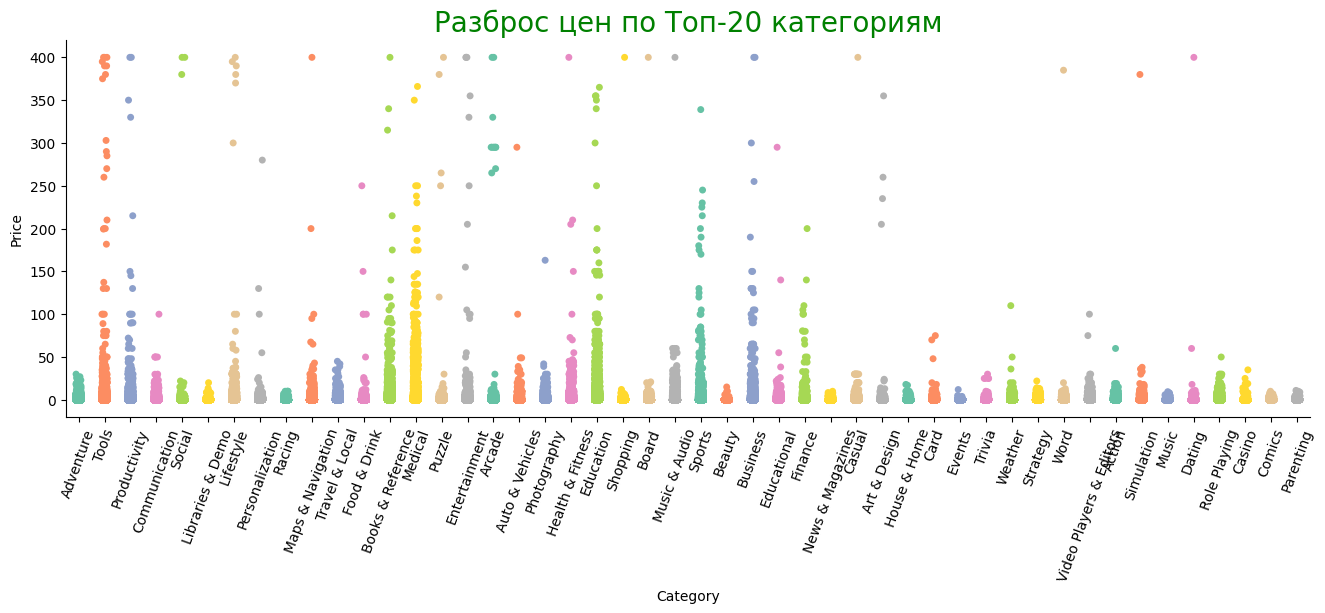

In [283]:
# Разброс цен приложений по категориям
pict=sns.catplot(
    x='Category', 
    y='Price', 
    data=pl_store, 
    kind='strip', 
    height=4.5, 
    aspect=3,
    palette='Set2'
    );
pict.tick_params(axis='x', rotation=70) 
plt.title('Разброс цен по Топ-20 категориям', size=20, color='g');

In [70]:
df4=pl_store.groupby(['Category'])['Price'].count().sort_values(ascending=False).reset_index().nlargest(20,'Price')
df4

,Category,Price
0,Education,241090
1,Music & Audio,154906
2,Tools,143988
3,Business,143771
4,Entertainment,138276
5,Lifestyle,118331
6,Books & Reference,116728
7,Personalization,89210
8,Health & Fitness,83510
9,Productivity,79698


In [285]:
# Убираем цены с 0 и сортируем категории по наличию наибольшего кол-ва цен в каждой категории
dol=pl_store.query("Price!=0") # убрали нули из DataFrame
dor=dol.groupby(['Category'])['Price'].count().sort_values(ascending=False).reset_index().nlargest(20,'Price')
# Создаем список из 20 категорий понаибольшему количеству цен в каждой категории
sol=list(dor['Category'])
# Оставляем только те котигории, которые указаны в списке sol ( с помощью isin спользуется для фильтрации данных, проверяя, содержится ли каждый элемент в DataFrame)
tot_1=dol[dol['Category'].isin(sol)]
tot_tab=tot_1.sort_values(by=['Category', 'Price'])
tot_tab.head(5)


,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
1824488,CLANNAD,jp.co.prot.clannad,Adventure,4.7,950.0,"10,000+","10,000.0",32628,Paid,0.9,USD,Varies with device,2018,2018,False,False,2021-06-16 05:54:30
2328,Monster Adventures - Monster Collecting Action...,com.foursakenmedia.monsteradventuresdeluxe,Adventure,4.2,361.0,"5,000+","5,000.0",5935,Paid,1.0,USD,2.3 and up,2014,2014,False,True,2021-06-15 20:21:50
36505,Super Lumberjack - top indie clicker game,com.Studio17.SuperLumberjack,Adventure,0.0,0.0,10+,10.0,39,Paid,1.0,USD,4.0.3 and up,2019,2020,False,False,2021-06-15 20:55:52
40224,The Lie - Cottage Of Secrets,com.games3ctechies.thelie1,Adventure,4.9,15.0,50+,50.0,78,Paid,1.0,USD,4.0.3 and up,2017,2018,False,False,2021-06-15 20:59:34
64049,Sertão Adventure Plus,com.tatumidia.sertaoadventureplus,Adventure,0.0,0.0,10+,10.0,12,Paid,1.0,USD,5.1 and up,2018,2020,False,False,2021-06-15 21:23:07


## Находим самые дорогие приложения по категориям

In [279]:
max_pr=pl_store.groupby(['App_name','Category','Maximum_installs'])['Price'].max().reset_index().nlargest(15,'Price')
max_pr=max_pr.reset_index()
max_pr


,index,App_name,Category,Maximum_installs,Price
0,1100648,MESH Connect,Productivity,25,400.0
1,62438,Accounting Provider for Green Office Flow,Tools,0,400.0
2,63573,Acid Reflux Treatment,Health & Fitness,1,400.0
3,149589,AudD,Music & Audio,4397,400.0
4,180001,Baby Nightmares,Arcade,5,400.0
5,356382,Challenge Impossible Ball for you,Arcade,4,400.0
6,874623,I'm Rich - VIP Club Limited,Business,0,400.0
7,1091647,Luxsure,Entertainment,1,400.0
8,1206425,Most Expensive Clicker,Casual,5,400.0
9,1206536,Most expensive word game,Board,5523,400.0


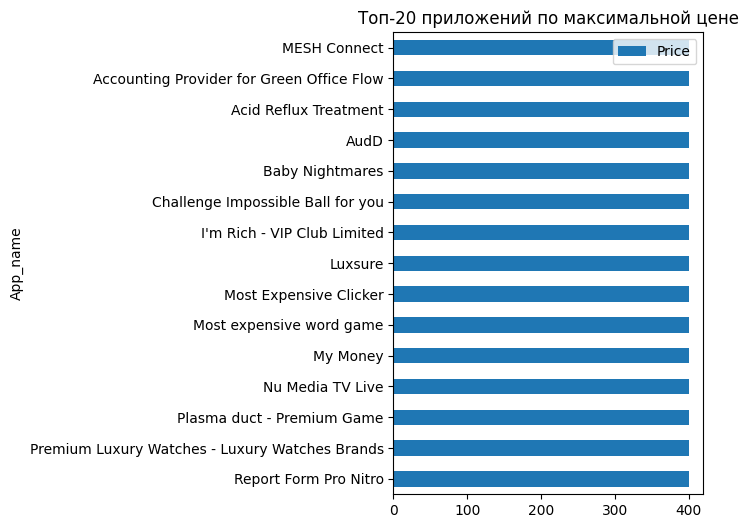

In [298]:

max_pr.sort_index(ascending=False).plot(x='App_name', y='Price', kind='barh',figsize=(4, 6),
         logx=False, 
         title='Топ-20 приложений по максимальной цене')
plt.show()


In [125]:
min_pr=dol.groupby(['App_name','Category','Minimum_installs'])['Price'].min().reset_index().nsmallest(15, 'Price')
min_pr=min_pr.reset_index()
min_pr

,index,App_name,Category,Minimum_installs,Price
0,16812,História - Boa Noitinha,Entertainment,10.0,0.194824
1,18479,Jogo da memória - Gênio,Puzzle,0.0,0.194824
2,29349,Rajasthan Geography Pro,Education,10.0,0.204735
3,42364,"Мои Открытки. Поздравления, цитаты, шутки.",Books & Reference,10.0,0.207889
4,42428,Оказание первой помощи,Books & Reference,10.0,0.207889
5,42448,Охрана труда в строительстве,Books & Reference,50.0,0.207889
6,42449,Охрана труда на производстве,Books & Reference,100.0,0.207889
7,42599,Расчет отпускных,Finance,100.0,0.207889
8,42772,Тест ОТ при работе на высоте,Books & Reference,100.0,0.207889
9,42777,Тест подъёмные сооружения груз,Books & Reference,50.0,0.207889


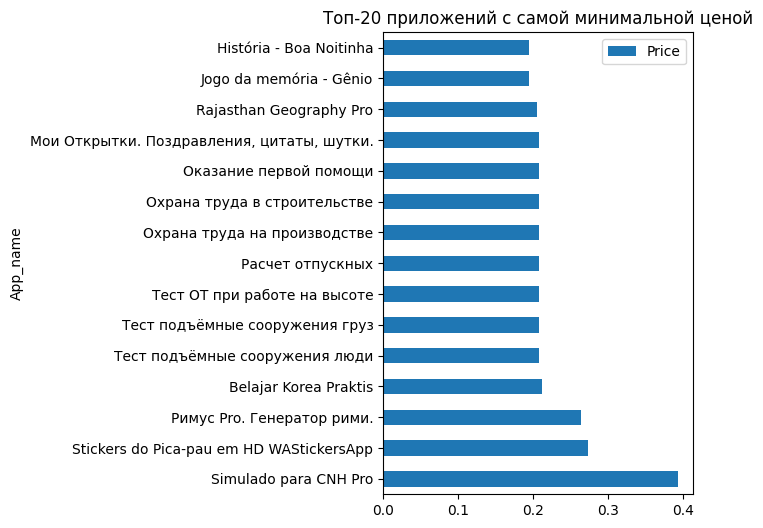

In [126]:
from pylab import rcParams
min_pr.sort_index(ascending=False).plot(x='App_name', y='Price', kind='barh',figsize=(4, 6),
         logx=False, 
         title='Топ-20 приложений c самой минимальной ценой')
plt.show()

## Самые дорогие категории

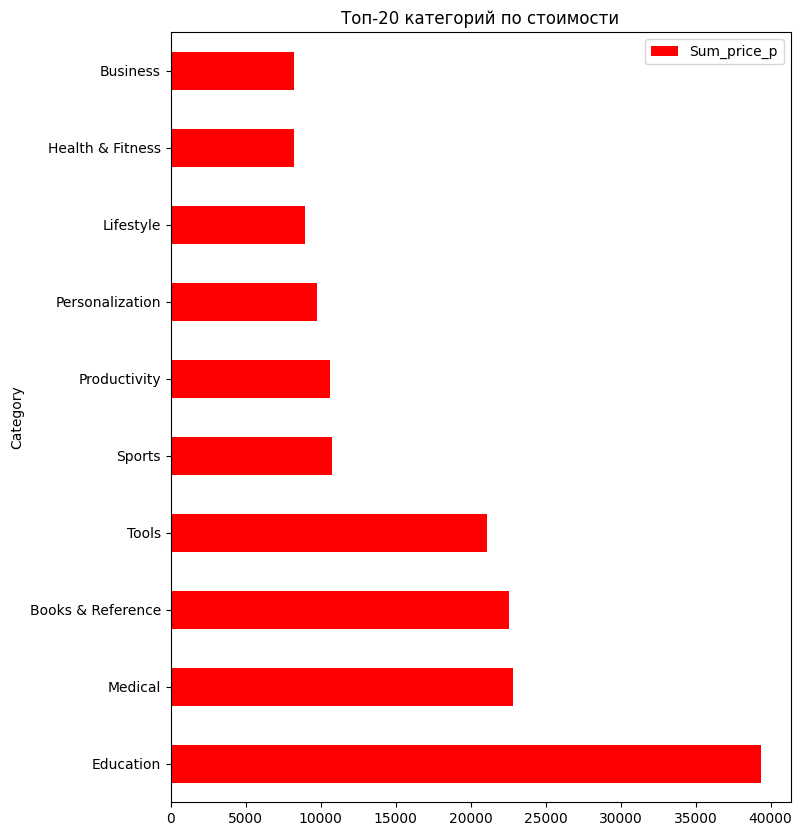

In [299]:
rich_p=pl_store.groupby(['Category'])['Price'].sum().sort_values(ascending=False).reset_index().rename(columns={'Price': 'Sum_price_p'}).nlargest(10,'Sum_price_p').sort_values(by='Sum_price_p',ascending=False)
rich_p
rich_p.plot(x='Category', y='Sum_price_p', kind='barh',figsize=(8, 10),
         logx=False, 
         title='Топ-20 категорий по стоимости', color='r')
plt.show()


## Самые дорогие категории

In [123]:
rich_p

,Category,Sum_price_p
0,Education,39355.845003
1,Medical,22810.652198
2,Books & Reference,22554.723717
3,Tools,21123.579194
4,Sports,10753.729041
5,Productivity,10611.865735
6,Personalization,9737.579129
7,Lifestyle,8986.246251
8,Health & Fitness,8259.356415
9,Business,8238.156126


## Какие категории содержат самое большое количество приложений без отзывов 

In [291]:
pl_store.columns

Index(['App_name', 'App_id', 'Category', 'Rating', 'Rating_count', 'Installs',
       'Minimum_installs', 'Maximum_installs', 'Free', 'Price', 'Currency',
       'Minimum Android', 'Released', 'Last_updated', 'Ad_supported',
       'In_app_purchases', 'Scraped Time'],
      dtype='object')

In [292]:
pl_store['Rating'].value_counts().reset_index().sort_values(by='Rating',ascending=True).head(5)

,Rating,count
0,0.0,1059762
38,1.0,713
41,1.1,236
40,1.2,531
39,1.3,579


In [300]:
# Создаем список из 20 категорий понаибольшему количеству цен в каждой категории
rat=pl_store.groupby(['Category'])['Rating'].count().sort_values(ascending=False).reset_index().nlargest(20,'Rating')
rat
catalog=list(rat['Category'])
# Оставляем только те котигории, которые указаны в списке sol ( с помощью isi используется для фильтрации данных, проверяя, содержится ли каждый элемент в DataFrame)
tot_rat1=pl_store[pl_store['Category'].isin(catalog)]
tot_rat=tot_rat1.sort_values(by=['Category','Rating'])
tot_rat.head(5)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
26,CUBIC RUNNER,jp.ga_software.cubicrunner,Arcade,0.0,0.0,"1,000+","1,000.0",1068,Free,0.0,USD,4.0 and up,2015,2015,True,True,2021-06-15 20:19:37
68,Pick Lock,com.BlueDrop.PickLock,Arcade,0.0,0.0,50+,50.0,79,Free,0.0,USD,4.1 and up,2020,2020,False,False,2021-06-15 20:19:39
185,Collapsy Stairs,com.subcortical.collapsystairs,Arcade,0.0,0.0,"1,000+","1,000.0",2422,Free,0.0,USD,4.0.3 and up,2019,2019,True,False,2021-06-15 20:19:46
283,Pteranodon Dinosaurs Games,com.godevelopers.Pterodactyl,Arcade,0.0,0.0,100+,100.0,295,Free,0.0,USD,4.4 and up,2021,2021,True,False,2021-06-15 20:19:52
355,kelle,com.alex.kele,Arcade,0.0,0.0,10+,10.0,11,Free,0.0,CAD,4.1 and up,2020,2020,False,False,2021-06-15 20:19:56


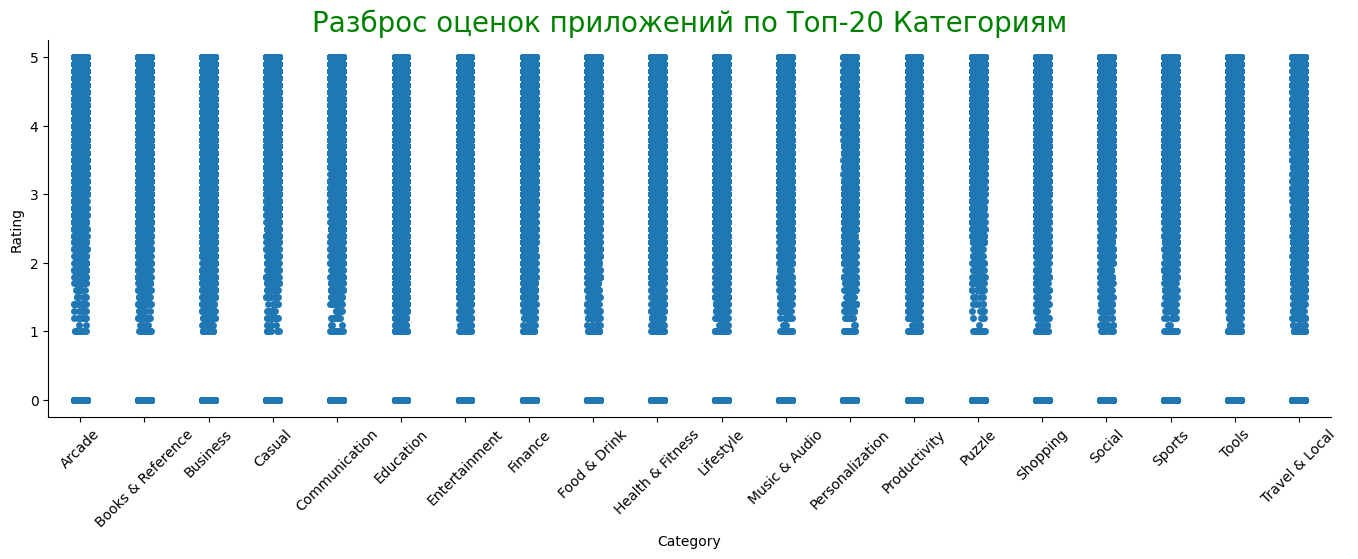

In [301]:
pict1=sns.catplot(
    x='Category', 
    y='Rating', 
    data=tot_rat, 
    kind='strip', 
    height=4.5, 
    aspect=3
    );
pict1.tick_params(axis='x', rotation=45) 
plt.title('Разброс оценок приложений по Топ-20 Категориям', size=20, color='g');

In [302]:
query_5='''SELECT Category, count(Rating) AS rating_quant FROM play_store WHERE Rating=0 GROUP BY Category ORDER BY rating_quant DESC;

'''
result_5=c.execute(query_5).fetchall()
result_5

[('Education', 111528),
 ('Business', 91652),
 ('Music & Audio', 74406),
 ('Lifestyle', 62539),
 ('Tools', 56922),
 ('Entertainment', 54003),
 ('Food & Drink', 50555),
 ('Books & Reference', 49454),
 ('Health & Fitness', 49216),
 ('Shopping', 41939),
 ('Productivity', 40487),
 ('Travel & Local', 34923),
 ('Personalization', 31201),
 ('Finance', 25711),
 ('Communication', 22890),
 ('Arcade', 22392),
 ('Casual', 20288),
 ('Sports', 20259),
 ('Social', 18801),
 ('Puzzle', 18330),
 ('Medical', 17255),
 ('News & Magazines', 17078),
 ('Photography', 12541),
 ('Maps & Navigation', 11313),
 ('Art & Design', 9368),
 ('Events', 8916),
 ('Action', 8714),
 ('Educational', 8648),
 ('House & Home', 8631),
 ('Auto & Vehicles', 8493),
 ('Beauty', 7566),
 ('Adventure', 7054),
 ('Trivia', 4485),
 ('Simulation', 3594),
 ('Video Players & Editors', 3332),
 ('Board', 3301),
 ('Word', 2666),
 ('Racing', 2639),
 ('Libraries & Demo', 2474),
 ('Dating', 2319),
 ('Strategy', 2271),
 ('Card', 1884),
 ('Weather',

In [303]:
columns_rat= [column[0] for column in c.description]
columns_rat

['Category', 'rating_quant']

In [305]:
table_5=pd.DataFrame(result_5, columns=columns_rat)
table_5.head(4)

,Category,rating_quant
0,Education,111528
1,Business,91652
2,Music & Audio,74406
3,Lifestyle,62539


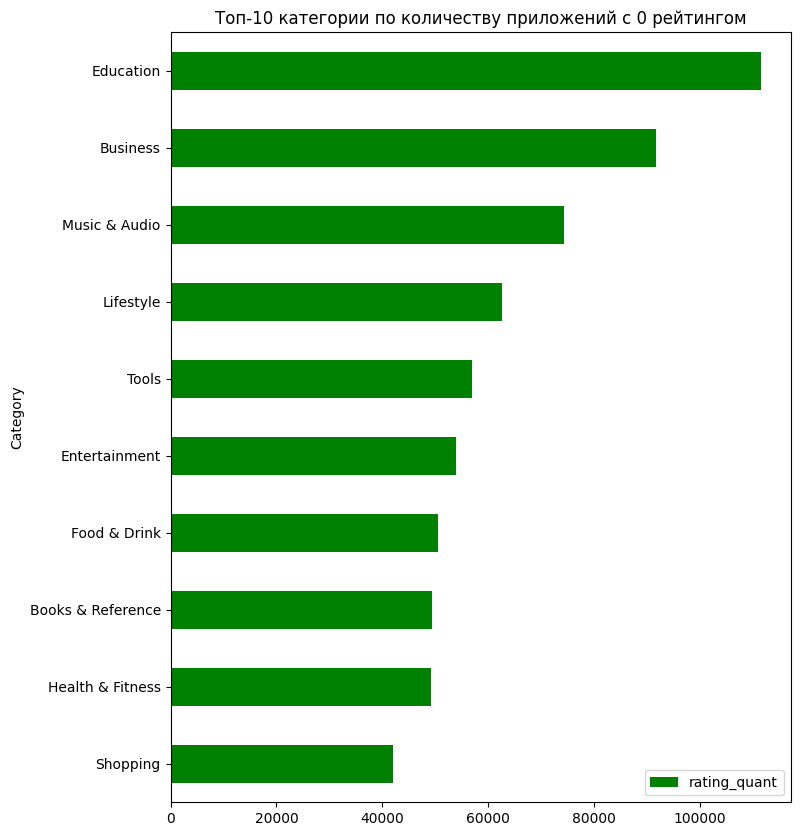

In [306]:
table_5.head(10).sort_values(by='rating_quant',ascending=True).plot(x='Category', y='rating_quant', kind='barh',figsize=(8, 10),
         logx=False, 
         title='Топ-10 категории по количеству приложений с 0 рейтингом', color='g')
plt.show()

## Корреляция

In [308]:
pl_store.columns

Index(['App_name', 'App_id', 'Category', 'Rating', 'Rating_count', 'Installs',
       'Minimum_installs', 'Maximum_installs', 'Free', 'Price', 'Currency',
       'Minimum Android', 'Released', 'Last_updated', 'Ad_supported',
       'In_app_purchases', 'Scraped Time'],
      dtype='object')

In [309]:
pl_cor=pl_store[['Rating','Rating_count','Maximum_installs','Price','Minimum_installs']]
pl_cor

,Rating,Rating_count,Maximum_installs,Price,Minimum_installs
0,0.0,0.0,15,0.0,10.0
1,4.4,64.0,7662,0.0,"5,000.0"
2,0.0,0.0,58,0.0,50.0
3,5.0,5.0,19,0.0,10.0
4,0.0,0.0,478,0.0,100.0
...,...,...,...,...,...
2312939,4.3,"16,775.0",337109,0.0,"100,000.0"
2312940,0.0,0.0,430,0.0,100.0
2312941,0.0,0.0,202,0.0,100.0
2312942,3.5,8.0,2635,0.0,"1,000.0"


In [310]:
corr = pl_cor.corr()
corr

,Rating,Rating_count,Maximum_installs,Price,Minimum_installs
Rating,1.0,0.0,0.0,-0.0,0.0
Rating_count,0.0,1.0,0.5,-0.0,0.5
Maximum_installs,0.0,0.5,1.0,-0.0,1.0
Price,-0.0,-0.0,-0.0,1.0,-0.0
Minimum_installs,0.0,0.5,1.0,-0.0,1.0


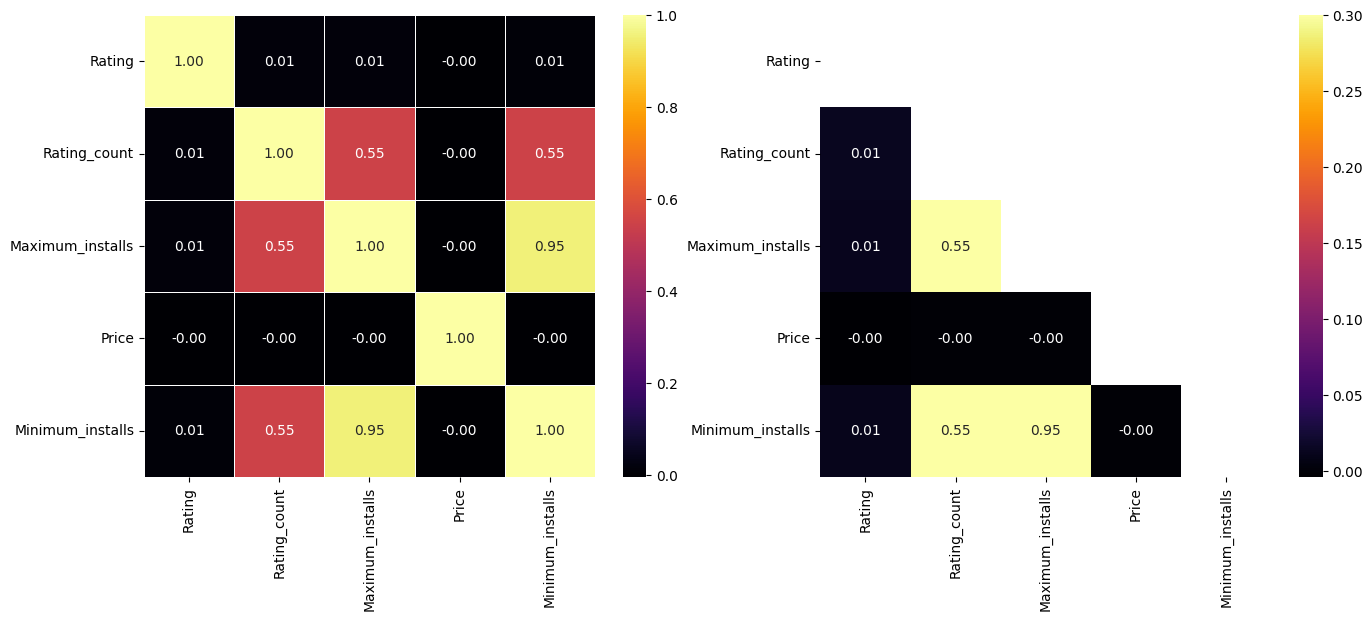

In [311]:
# Визуализируем корреляционную матрицу.
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1);

plt.show()